In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

### Generation of customized dataset of retinal fundus images and its label distribution
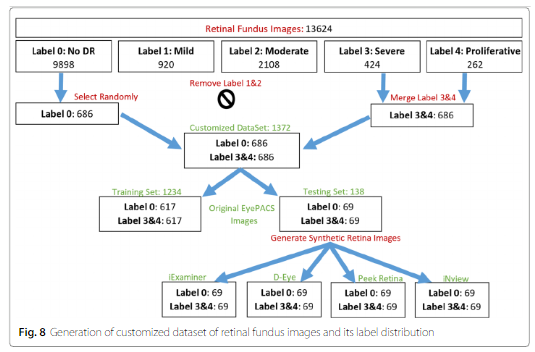

[Reference](https://www.researchgate.net/publication/342711250_Comparison_of_smartphone-based_retinal_imaging_systems_for_diabetic_retinopathy_detection_using_deep_learning)


In [40]:
training_data = pd.read_csv('C:\\Users\\hsr30\\Documents\\minor-project\\datasets\\idrid\\Disease Grading\\Groundtruths\\IDRiD_Disease Grading_Training Labels.csv')
testing_data = pd.read_csv('C:\\Users\\hsr30\\Documents\\minor-project\\datasets\\idrid\\Disease Grading\\Groundtruths\\IDRiD_Disease Grading_Testing Labels.csv')

output_csv_train= "C:\\Users\\hsr30\\Documents\\minor-project\\datasets\\disease-grading-custom\\groundtruths\\idrid-train.csv"
output_csv_test= "C:\\Users\\hsr30\\Documents\\minor-project\\datasets\\disease-grading-custom\\groundtruths\\idrid-test.csv"

In [41]:
training_data.head()

,Image name,diagnosis,macular edema
0,IDRiD_001,3,2
1,IDRiD_002,3,2
2,IDRiD_003,2,2
3,IDRiD_004,3,2
4,IDRiD_005,4,0


<Axes: xlabel='diagnosis'>

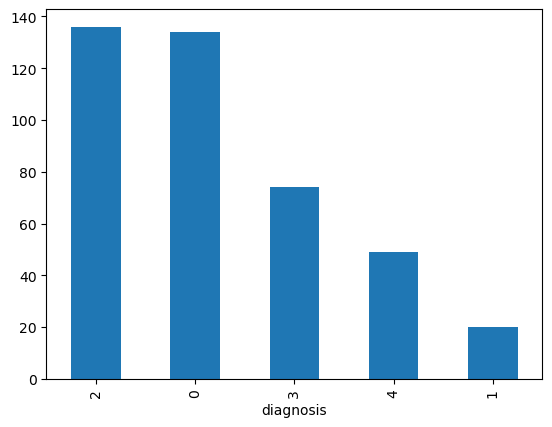

In [42]:
training_data['diagnosis'].value_counts().plot(kind='bar')

### Original Labels
`0` => `No DR` <br>
`1` => `Mild` <br>
`2` => `Moderate` <br>
`3` => `Severe` <br>
`4` => `Proliferative DR` <br>


### New Labels
`0` => `No DR`,  `Mild` <br>
`1` =>  `Moderate`, `Severe`, `Proliferative DR`


In [43]:
# iterate over each row and append the values in list
def modify_label(org_label):
    if org_label == 0 or org_label == 1:
        return 0
    return 1
    
# create a new dict with image name as key and label as value
def create_dict(df):
    dict = {}
    for index, row in df.iterrows():
        dict[row['Image name']] = modify_label(row['diagnosis'])
    return dict
train_labels_dict = create_dict(training_data)
test_labels_dict = create_dict(testing_data)

In [44]:
print(train_labels_dict)

{'IDRiD_001': 1, 'IDRiD_002': 1, 'IDRiD_003': 1, 'IDRiD_004': 1, 'IDRiD_005': 1, 'IDRiD_006': 1, 'IDRiD_007': 1, 'IDRiD_008': 1, 'IDRiD_009': 1, 'IDRiD_010': 1, 'IDRiD_011': 1, 'IDRiD_012': 1, 'IDRiD_013': 1, 'IDRiD_014': 1, 'IDRiD_015': 1, 'IDRiD_016': 1, 'IDRiD_017': 1, 'IDRiD_018': 1, 'IDRiD_019': 1, 'IDRiD_020': 1, 'IDRiD_021': 0, 'IDRiD_022': 1, 'IDRiD_023': 1, 'IDRiD_024': 1, 'IDRiD_025': 1, 'IDRiD_026': 1, 'IDRiD_027': 1, 'IDRiD_028': 1, 'IDRiD_029': 1, 'IDRiD_030': 1, 'IDRiD_031': 1, 'IDRiD_032': 1, 'IDRiD_033': 1, 'IDRiD_034': 1, 'IDRiD_035': 1, 'IDRiD_036': 1, 'IDRiD_037': 1, 'IDRiD_038': 1, 'IDRiD_039': 1, 'IDRiD_040': 1, 'IDRiD_041': 1, 'IDRiD_042': 1, 'IDRiD_043': 1, 'IDRiD_044': 1, 'IDRiD_045': 1, 'IDRiD_046': 1, 'IDRiD_047': 1, 'IDRiD_048': 1, 'IDRiD_049': 1, 'IDRiD_050': 1, 'IDRiD_051': 1, 'IDRiD_052': 1, 'IDRiD_053': 1, 'IDRiD_054': 1, 'IDRiD_055': 1, 'IDRiD_056': 1, 'IDRiD_057': 1, 'IDRiD_058': 1, 'IDRiD_059': 1, 'IDRiD_060': 1, 'IDRiD_061': 1, 'IDRiD_062': 1, 'IDRiD_

In [45]:
print(test_labels_dict)

{'IDRiD_001': 1, 'IDRiD_002': 1, 'IDRiD_003': 1, 'IDRiD_004': 1, 'IDRiD_005': 1, 'IDRiD_006': 1, 'IDRiD_007': 1, 'IDRiD_008': 1, 'IDRiD_009': 1, 'IDRiD_010': 1, 'IDRiD_011': 1, 'IDRiD_012': 1, 'IDRiD_013': 1, 'IDRiD_014': 1, 'IDRiD_015': 1, 'IDRiD_016': 1, 'IDRiD_017': 1, 'IDRiD_018': 1, 'IDRiD_019': 1, 'IDRiD_020': 1, 'IDRiD_021': 1, 'IDRiD_022': 1, 'IDRiD_023': 1, 'IDRiD_024': 1, 'IDRiD_025': 1, 'IDRiD_026': 1, 'IDRiD_027': 1, 'IDRiD_028': 1, 'IDRiD_029': 0, 'IDRiD_030': 0, 'IDRiD_031': 1, 'IDRiD_032': 1, 'IDRiD_033': 1, 'IDRiD_034': 1, 'IDRiD_035': 1, 'IDRiD_036': 1, 'IDRiD_037': 0, 'IDRiD_038': 0, 'IDRiD_039': 0, 'IDRiD_040': 1, 'IDRiD_041': 0, 'IDRiD_042': 1, 'IDRiD_043': 0, 'IDRiD_044': 0, 'IDRiD_045': 0, 'IDRiD_046': 1, 'IDRiD_047': 0, 'IDRiD_048': 1, 'IDRiD_049': 1, 'IDRiD_050': 0, 'IDRiD_051': 1, 'IDRiD_052': 0, 'IDRiD_053': 1, 'IDRiD_054': 0, 'IDRiD_055': 0, 'IDRiD_056': 0, 'IDRiD_057': 1, 'IDRiD_058': 0, 'IDRiD_059': 1, 'IDRiD_060': 1, 'IDRiD_061': 1, 'IDRiD_062': 1, 'IDRiD_

In [46]:
# create a new dataframe with image name and label

train_df = pd.DataFrame(columns = ['Image name','diagnosis'])
test_df = pd.DataFrame(columns = ['Image name','diagnosis'])

In [47]:
# Read all agumented images from the folder
# Iterate over each image and append the values in the dataframe
train_images_path = "C:\\Users\\hsr30\\Documents\\minor-project\\datasets\\disease-grading-custom\\final-training"
test_images_path = "C:\\Users\\hsr30\\Documents\\minor-project\\datasets\\disease-grading-custom\\final-testing"


In [48]:
for image in os.listdir(train_images_path):
    image_name = image.split('-')[0]
    train_df = pd.concat([train_df, pd.DataFrame([[image[0:-4], train_labels_dict[image_name]]], columns = ['Image name','diagnosis'])], ignore_index=True)

for image in os.listdir(test_images_path):
    image_name = image.split('-')[0]
    test_df = pd.concat([test_df, pd.DataFrame([[image[0:-4], test_labels_dict[image_name]]], columns = ['Image name','diagnosis'])], ignore_index=True)

In [49]:
# check if the images in dataframe are in the folder
# if not then remove the image from the dataframe
count = 0
for index, row in train_df.iterrows():
    if not os.path.exists(train_images_path + "\\" + row['Image name'] + ".png"):
        print("Image not found: " + row['Image name'])
        count += 1
        train_df.drop(index, inplace=True)
print("Total images not found: " + str(count))

Total images not found: 0


In [50]:
train_df.head()


,Image name,diagnosis
0,IDRiD_001-0-90-3500,1
1,IDRiD_002-0-90-3500,1
2,IDRiD_003-0-90-3500,1
3,IDRiD_004-0-90-3500,1
4,IDRiD_005-0-90-3500,1


### EDA

In [51]:
test_df.head()

,Image name,diagnosis
0,IDRiD_002-0-90-3500,1
1,IDRiD_003-0-90-3500,1
2,IDRiD_004-0-90-3500,1
3,IDRiD_005-0-90-3500,1
4,IDRiD_006-0-90-3500,1


<Axes: xlabel='diagnosis'>

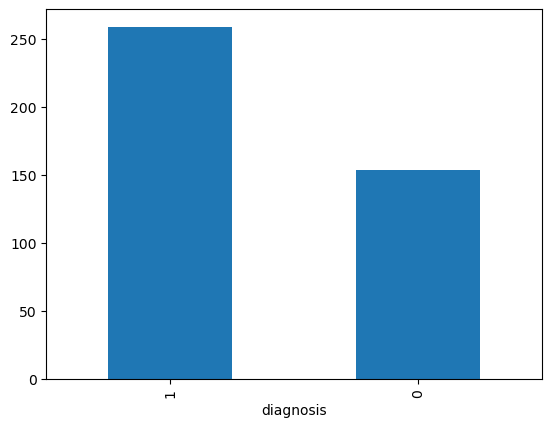

In [52]:
train_df['diagnosis'].value_counts().plot(kind='bar')



<Axes: xlabel='diagnosis'>

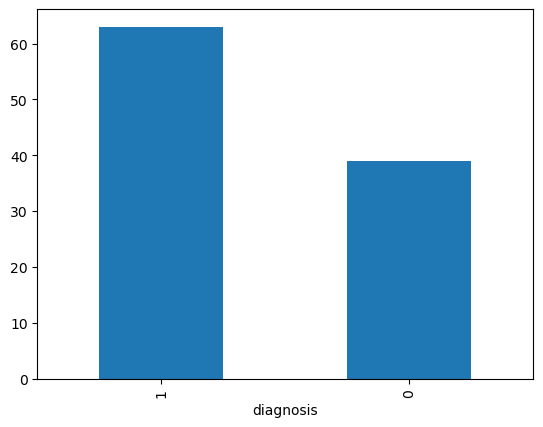

In [53]:
test_df['diagnosis'].value_counts().plot(kind='bar')

### Save the new labels to a csv file

In [54]:
train_df.to_csv(output_csv_train, index=False)
test_df.to_csv(output_csv_test, index=False)